In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import csv
import os
import re
import pickle

In [2]:
def pickleme(obj,dest):
    """
    pickles obj to dest
    """
    
    out = open(dest,'wb')
    pickle.dump(obj,out)
    out.close()

In [3]:
def unpickle(file):
    """
    creates obj from pickle file
    """
    infile = open('all_rp5','rb')
    obj = pickle.load(infile)
    infile.close()
    return obj

In [4]:
rp5 = unpickle('all_rp5')

In [5]:
rp5.head()

,datetime,temp(c),del,pressure(mmhg),pressure change,humidity,wind direction,windspeed (m/s),maxgust,ff3,...,visibility(km),dewpoint temp,rain(mm),time of rain,groundstate,soiltemp(c),snow groundstate,snowdepth(cm),region,country
0,01.05.2019 23:00,25.5,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.5,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria
1,01.05.2019 22:00,25.9,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.1,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria
2,01.05.2019 21:00,26.1,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.1,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria
3,01.05.2019 20:00,26.4,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.3,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria
4,01.05.2019 19:00,28.0,NaN,NaN,NaN,11,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.2,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria


In [6]:
rp5.rename({'del':'slpressure'},axis='columns',inplace=True)
rp5.head()

,datetime,temp(c),slpressure,pressure(mmhg),pressure change,humidity,wind direction,windspeed (m/s),maxgust,ff3,...,visibility(km),dewpoint temp,rain(mm),time of rain,groundstate,soiltemp(c),snow groundstate,snowdepth(cm),region,country
0,01.05.2019 23:00,25.5,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.5,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria
1,01.05.2019 22:00,25.9,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.1,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria
2,01.05.2019 21:00,26.1,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.1,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria
3,01.05.2019 20:00,26.4,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.3,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria
4,01.05.2019 19:00,28.0,NaN,NaN,NaN,11,"Calm, no wind",0.0,NaN,NaN,...,NaN,-5.2,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria


In [7]:
completeness = rp5.count()/len(rp5)
completeness

datetime               1.000000
temp(c)                0.998870
slpressure             0.903211
pressure(mmhg)         0.835064
pressure change        0.849499
humidity               0.983322
wind direction         0.975631
windspeed (m/s)        0.361610
maxgust                0.079739
ff3                    0.009741
cloudcover             0.892262
ww                     0.975305
w1                     0.677845
w2                     0.048460
mintemp                0.054522
maxtemp                0.051668
cloudtype1             0.217586
amt cloudtype1         0.217581
lowest cloud height    0.218504
cloudtype2             0.202706
cloudtype3             0.184191
visibility(km)         0.282644
dewpoint temp          0.357867
rain(mm)               0.065571
time of rain           0.065571
groundstate            0.001908
soiltemp(c)            0.000996
snow groundstate       0.000039
snowdepth(cm)          0.000036
region                 1.000000
country                1.000000
dtype: f

# Switch Wind/Humidity

In [8]:
rp5[rp5['humidity'].astype(str).str.contains('Wind')]

,datetime,temp(c),slpressure,pressure(mmhg),pressure change,humidity,wind direction,windspeed (m/s),maxgust,ff3,...,visibility(km),dewpoint temp,rain(mm),time of rain,groundstate,soiltemp(c),snow groundstate,snowdepth(cm),region,country
0,01.05.2019 16:00,41.0,712.7,756.2,NaN,Wind blowing from the west,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad
1,01.05.2019 15:00,41.0,713.3,756.9,NaN,Wind blowing from the east,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad
4,01.05.2019 12:00,41.0,714.1,757.7,NaN,Wind blowing from the west,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad
5,01.05.2019 10:00,37.0,714.8,759.0,NaN,Wind blowing from the south-west,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad
6,01.05.2019 09:00,36.0,714.6,759.0,NaN,Wind blowing from the south,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad
7,01.05.2019 08:00,34.0,714.4,759.0,NaN,Wind blowing from the south,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad
9,30.04.2019 16:00,41.0,711.9,755.4,NaN,Wind blowing from the north,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad
12,30.04.2019 13:00,43.0,713.6,756.9,NaN,Wind blowing from the south,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad
14,30.04.2019 10:00,39.0,715.1,759.0,NaN,Wind blowing from the east,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad
15,30.04.2019 09:00,37.0,714.8,759.0,NaN,Wind blowing from the east,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abeche,Chad


In [10]:
whdf = rp5.copy()[['wind direction','humidity']]
whdf

,wind direction,humidity
0,"Calm, no wind",12
1,"Calm, no wind",12
2,"Calm, no wind",12
3,"Calm, no wind",12
4,"Calm, no wind",11
5,"Calm, no wind",10
6,"Calm, no wind",9
7,"Calm, no wind",10
8,"Calm, no wind",11
9,"Calm, no wind",11


In [11]:
whdf.loc[whdf['humidity'].astype(str).str.contains(' '), ['humidity', 'wind direction']] = whdf.loc[whdf['humidity'].astype(str).str.contains(' '), ['wind direction', 'humidity']].values

In [12]:
whdf['wind direction'].unique()

array(['Calm, no wind', 'Wind blowing from the west',
       'Wind blowing from the east', 'Wind blowing from the south-west',
       'Wind blowing from the south', 'Wind blowing from the north',
       'Wind blowing from the south-east',
       'Wind blowing from the east-northeast',
       'Wind blowing from the east-southeast',
       'Wind blowing from the west-northwest',
       'Wind blowing from the north-west',
       'Wind blowing from the north-east',
       'Wind blowing from the north-northeast',
       'Wind blowing from the west-southwest',
       'Wind blowing from the north-northwest',
       'Wind blowing from the south-southeast', 'variable wind direction',
       'Wind blowing from the south-southwest', nan], dtype=object)

In [13]:
rp5[['wind direction','humidity']] = whdf

In [15]:
np.set_printoptions(suppress=True)

In [16]:
windspeeds = rp5.groupby('windspeed (m/s)').count()['region'].reset_index()
windspeeds

,windspeed (m/s),region
0,0.0,188199
1,1.0,91693
2,2.0,158109
3,3.0,127983
4,4.0,90005
5,5.0,72841
6,6.0,41972
7,7.0,27893
8,8.0,20014
9,9.0,12664


(-0.5, 25)

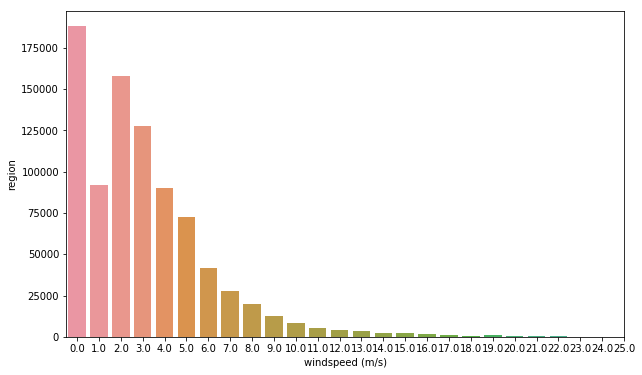

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='windspeed (m/s)',y='region',data=windspeeds)
plt.xlim(right=25)

In [18]:
completeness = rp5.count()/len(rp5)
completeness

datetime               1.000000
temp(c)                0.998870
slpressure             0.903211
pressure(mmhg)         0.835064
pressure change        0.849499
humidity               0.983322
wind direction         0.975631
windspeed (m/s)        0.361610
maxgust                0.079739
ff3                    0.009741
cloudcover             0.892262
ww                     0.975305
w1                     0.677845
w2                     0.048460
mintemp                0.054522
maxtemp                0.051668
cloudtype1             0.217586
amt cloudtype1         0.217581
lowest cloud height    0.218504
cloudtype2             0.202706
cloudtype3             0.184191
visibility(km)         0.282644
dewpoint temp          0.357867
rain(mm)               0.065571
time of rain           0.065571
groundstate            0.001908
soiltemp(c)            0.000996
snow groundstate       0.000039
snowdepth(cm)          0.000036
region                 1.000000
country                1.000000
dtype: f

# Datetime: Add 'date' and 'month'

In [19]:
rp5['datetime'] = pd.to_datetime(rp5['datetime'],format='%d.%m.%Y %H:%M')

In [20]:
rp5['date'] = rp5['datetime'].dt.date
rp5.head()

,datetime,temp(c),slpressure,pressure(mmhg),pressure change,humidity,wind direction,windspeed (m/s),maxgust,ff3,...,dewpoint temp,rain(mm),time of rain,groundstate,soiltemp(c),snow groundstate,snowdepth(cm),region,country,date
0,2019-05-01 23:00:00,25.5,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,-5.5,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria,2019-05-01
1,2019-05-01 22:00:00,25.9,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,-5.1,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria,2019-05-01
2,2019-05-01 21:00:00,26.1,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,-5.1,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria,2019-05-01
3,2019-05-01 20:00:00,26.4,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,-5.3,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria,2019-05-01
4,2019-05-01 19:00:00,28.0,NaN,NaN,NaN,11,"Calm, no wind",0.0,NaN,NaN,...,-5.2,NaN,NaN,NaN,NaN,NaN,NaN,Abankor,Algeria,2019-05-01


In [21]:
rp5['month'] = rp5['datetime'].dt.month

# prep for group: dummies,fillna

In [22]:
rp5['wind direction'].unique()

array(['Calm, no wind', 'Wind blowing from the west',
       'Wind blowing from the east', 'Wind blowing from the south-west',
       'Wind blowing from the south', 'Wind blowing from the north',
       'Wind blowing from the south-east',
       'Wind blowing from the east-northeast',
       'Wind blowing from the east-southeast',
       'Wind blowing from the west-northwest',
       'Wind blowing from the north-west',
       'Wind blowing from the north-east',
       'Wind blowing from the north-northeast',
       'Wind blowing from the west-southwest',
       'Wind blowing from the north-northwest',
       'Wind blowing from the south-southeast', 'variable wind direction',
       'Wind blowing from the south-southwest', nan], dtype=object)

In [23]:
winddum = pd.get_dummies(rp5['wind direction'])

In [39]:
w = pd.concat([winddum,rp5['windspeed (m/s)']],axis='columns')

In [40]:
w2 = w.copy()

In [41]:
w['windspeed (m/s)'] = w['windspeed (m/s)'].fillna(-1)

In [42]:
w2.loc[w['Calm, no wind']==1,'windspeed (m/s)'] = w2.loc[w['Calm, no wind']==1,'windspeed (m/s)'].fillna(0)

In [43]:
sum(w2['windspeed (m/s)'] == w['windspeed (m/s)'])/len(w)

0.36161029026353647

In [44]:
w2.count()/len(w2)

Calm, no wind                            1.000000
Wind blowing from the east               1.000000
Wind blowing from the east-northeast     1.000000
Wind blowing from the east-southeast     1.000000
Wind blowing from the north              1.000000
Wind blowing from the north-east         1.000000
Wind blowing from the north-northeast    1.000000
Wind blowing from the north-northwest    1.000000
Wind blowing from the north-west         1.000000
Wind blowing from the south              1.000000
Wind blowing from the south-east         1.000000
Wind blowing from the south-southeast    1.000000
Wind blowing from the south-southwest    1.000000
Wind blowing from the south-west         1.000000
Wind blowing from the west               1.000000
Wind blowing from the west-northwest     1.000000
Wind blowing from the west-southwest     1.000000
variable wind direction                  1.000000
windspeed (m/s)                          0.409578
dtype: float64

In [26]:
w.groupby('windspeed (m/s)').sum()

,"Calm, no wind",Wind blowing from the east,Wind blowing from the east-northeast,Wind blowing from the east-southeast,Wind blowing from the north,Wind blowing from the north-east,Wind blowing from the north-northeast,Wind blowing from the north-northwest,Wind blowing from the north-west,Wind blowing from the south,Wind blowing from the south-east,Wind blowing from the south-southeast,Wind blowing from the south-southwest,Wind blowing from the south-west,Wind blowing from the west,Wind blowing from the west-northwest,Wind blowing from the west-southwest,variable wind direction
windspeed (m/s),,,,,,,,,,,,,,,,,,
-1.0,114575.0,118225.0,88283.0,57140.0,122925.0,86882.0,89983.0,67338.0,66194.0,91259.0,49936.0,50020.0,72123.0,80531.0,113172.0,59898.0,79607.0,72315.0
0.0,187746.0,50.0,39.0,20.0,14.0,51.0,57.0,18.0,29.0,37.0,23.0,22.0,16.0,25.0,26.0,10.0,6.0,0.0
1.0,0.0,8690.0,3189.0,3642.0,7278.0,7807.0,3209.0,2733.0,4818.0,8708.0,6655.0,3548.0,3537.0,11603.0,8317.0,2420.0,3320.0,1207.0
2.0,0.0,17869.0,6507.0,6708.0,12897.0,12049.0,7051.0,6172.0,7562.0,14022.0,9414.0,6554.0,6543.0,18226.0,13486.0,4969.0,5947.0,140.0
3.0,0.0,14950.0,6658.0,6031.0,11076.0,9104.0,6360.0,5880.0,6127.0,11346.0,6554.0,5793.0,5610.0,10734.0,9719.0,4690.0,5162.0,69.0
4.0,0.0,10062.0,4894.0,4029.0,8351.0,6165.0,4906.0,4833.0,4551.0,7613.0,4160.0,4023.0,4134.0,6052.0,6354.0,3811.0,3882.0,18.0
5.0,0.0,8255.0,4473.0,3247.0,7240.0,4926.0,4308.0,4217.0,3532.0,5432.0,2806.0,2891.0,3328.0,4690.0,5094.0,3359.0,3078.0,5.0
6.0,0.0,4314.0,2604.0,1813.0,4433.0,2878.0,2790.0,2545.0,2142.0,2900.0,1523.0,1542.0,1904.0,2231.0,3066.0,1947.0,1950.0,12.0
7.0,0.0,2796.0,1812.0,1140.0,3166.0,2013.0,1921.0,1536.0,1289.0,1747.0,799.0,898.0,1270.0,1411.0,2178.0,1316.0,1465.0,55.0


In [61]:
w2.loc[(w2['windspeed (m/s)']==0.0) & (w2['Calm, no wind']==0),'windspeed (m/s)'] = 1

In [62]:
w2.groupby('windspeed (m/s)').sum()

,"Calm, no wind",Wind blowing from the east,Wind blowing from the east-northeast,Wind blowing from the east-southeast,Wind blowing from the north,Wind blowing from the north-east,Wind blowing from the north-northeast,Wind blowing from the north-northwest,Wind blowing from the north-west,Wind blowing from the south,Wind blowing from the south-east,Wind blowing from the south-southeast,Wind blowing from the south-southwest,Wind blowing from the south-west,Wind blowing from the west,Wind blowing from the west-northwest,Wind blowing from the west-southwest,variable wind direction
windspeed (m/s),,,,,,,,,,,,,,,,,,
0.0,302321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,8740.0,3228.0,3662.0,7292.0,7858.0,3266.0,2751.0,4847.0,8745.0,6678.0,3570.0,3553.0,11628.0,8343.0,2430.0,3326.0,1207.0
2.0,0.0,17869.0,6507.0,6708.0,12897.0,12049.0,7051.0,6172.0,7562.0,14022.0,9414.0,6554.0,6543.0,18226.0,13486.0,4969.0,5947.0,140.0
3.0,0.0,14950.0,6658.0,6031.0,11076.0,9104.0,6360.0,5880.0,6127.0,11346.0,6554.0,5793.0,5610.0,10734.0,9719.0,4690.0,5162.0,69.0
4.0,0.0,10062.0,4894.0,4029.0,8351.0,6165.0,4906.0,4833.0,4551.0,7613.0,4160.0,4023.0,4134.0,6052.0,6354.0,3811.0,3882.0,18.0
5.0,0.0,8255.0,4473.0,3247.0,7240.0,4926.0,4308.0,4217.0,3532.0,5432.0,2806.0,2891.0,3328.0,4690.0,5094.0,3359.0,3078.0,5.0
6.0,0.0,4314.0,2604.0,1813.0,4433.0,2878.0,2790.0,2545.0,2142.0,2900.0,1523.0,1542.0,1904.0,2231.0,3066.0,1947.0,1950.0,12.0
7.0,0.0,2796.0,1812.0,1140.0,3166.0,2013.0,1921.0,1536.0,1289.0,1747.0,799.0,898.0,1270.0,1411.0,2178.0,1316.0,1465.0,55.0
8.0,0.0,2060.0,1363.0,787.0,2238.0,1499.0,1459.0,994.0,882.0,1289.0,636.0,643.0,904.0,1058.0,1472.0,879.0,1051.0,86.0


(-0.5, 25)

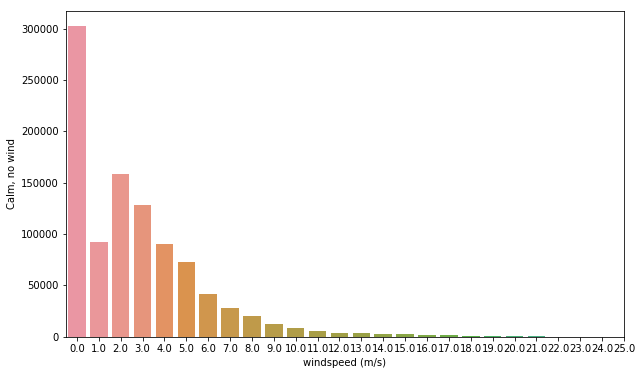

In [67]:
w2_cts = w2[['Calm, no wind','windspeed (m/s)']].groupby('windspeed (m/s)').count().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='windspeed (m/s)',y='Calm, no wind',data=w2_cts)
plt.xlim(right=25)

In [84]:
na_ws = pd.DataFrame(w2[w2['windspeed (m/s)'].isna()].sum()/len(w2[w2['windspeed (m/s)'].isna()])).reset_index()
na_ws.rename({0:'prop'},axis='columns',inplace=True)

In [85]:
na_ws

,index,prop
0,"Calm, no wind",0.000000
1,Wind blowing from the east,0.083831
2,Wind blowing from the east-northeast,0.062600
3,Wind blowing from the east-southeast,0.040517
4,Wind blowing from the north,0.087164
5,Wind blowing from the north-east,0.061606
6,Wind blowing from the north-northeast,0.063805
7,Wind blowing from the north-northwest,0.047748
8,Wind blowing from the north-west,0.046937
9,Wind blowing from the south,0.064710


In [90]:
dirs = na_ws['index']

0                             Calm, no wind
1                Wind blowing from the east
2      Wind blowing from the east-northeast
3      Wind blowing from the east-southeast
4               Wind blowing from the north
5          Wind blowing from the north-east
6     Wind blowing from the north-northeast
7     Wind blowing from the north-northwest
8          Wind blowing from the north-west
9               Wind blowing from the south
10         Wind blowing from the south-east
11    Wind blowing from the south-southeast
12    Wind blowing from the south-southwest
13         Wind blowing from the south-west
14               Wind blowing from the west
15     Wind blowing from the west-northwest
16     Wind blowing from the west-southwest
17                  variable wind direction
18                          windspeed (m/s)
Name: index, dtype: object

In [93]:
dirs = np.array(range(16))*2*np.pi/16
dirs = [-1] + dirs + []

array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357, 3.14159265, 3.53429174,
       3.92699082, 4.3196899 , 4.71238898, 5.10508806, 5.49778714,
       5.89048623])

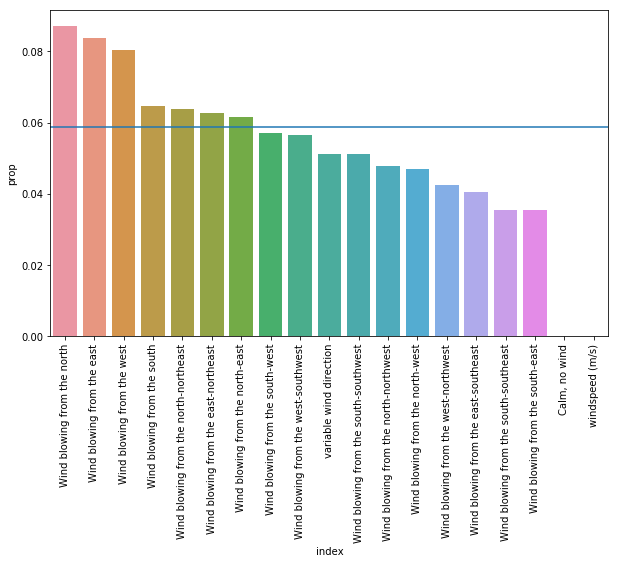

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='prop',data=na_ws.sort_values(by='prop',ascending=False))
plt.xticks(rotation=90)
plt.axhline(1/17)

In [94]:
1/17

0.058823529411764705

In [123]:
rp5dum = pd.concat([rp5,winddum],axis='columns')
rp5dum.head()

,datetime,temp(c),slpressure,pressure(mmhg),pressure change,humidity,wind direction,windspeed (m/s),maxgust,ff3,...,Wind blowing from the north-west,Wind blowing from the south,Wind blowing from the south-east,Wind blowing from the south-southeast,Wind blowing from the south-southwest,Wind blowing from the south-west,Wind blowing from the west,Wind blowing from the west-northwest,Wind blowing from the west-southwest,variable wind direction
0,2019-05-01 23:00:00,25.5,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2019-05-01 22:00:00,25.9,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2019-05-01 21:00:00,26.1,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2019-05-01 20:00:00,26.4,NaN,NaN,NaN,12,"Calm, no wind",0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2019-05-01 19:00:00,28.0,NaN,NaN,NaN,11,"Calm, no wind",0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [124]:
rp5dum.columns

Index(['datetime', 'temp(c)', 'slpressure', 'pressure(mmhg)',
       'pressure change', 'humidity', 'wind direction', 'windspeed (m/s)',
       'maxgust', 'ff3', 'cloudcover', 'ww', 'w1', 'w2', 'mintemp', 'maxtemp',
       'cloudtype1', 'amt cloudtype1', 'lowest cloud height', 'cloudtype2',
       'cloudtype3', 'visibility(km)', 'dewpoint temp', 'rain(mm)',
       'time of rain', 'groundstate', 'soiltemp(c)', 'snow groundstate',
       'snowdepth(cm)', 'region', 'country', 'date', 'month', 'Calm, no wind',
       'Wind blowing from the east', 'Wind blowing from the east-northeast',
       'Wind blowing from the east-southeast', 'Wind blowing from the north',
       'Wind blowing from the north-east',
       'Wind blowing from the north-northeast',
       'Wind blowing from the north-northwest',
       'Wind blowing from the north-west', 'Wind blowing from the south',
       'Wind blowing from the south-east',
       'Wind blowing from the south-southeast',
       'Wind blowing from the

In [125]:
rain = rp5[['rain(mm)','time of rain']].fillna(0)

In [126]:
rp5dum.dropna(axis='columns',thresh=round(.7*len(rp5)),inplace=True)
rp5dum = pd.concat([rp5dum,rain],axis='columns')
rp5dum.head()

,datetime,temp(c),slpressure,pressure(mmhg),pressure change,humidity,wind direction,cloudcover,ww,region,...,Wind blowing from the south-east,Wind blowing from the south-southeast,Wind blowing from the south-southwest,Wind blowing from the south-west,Wind blowing from the west,Wind blowing from the west-northwest,Wind blowing from the west-southwest,variable wind direction,rain(mm),time of rain
0,2019-05-01 23:00:00,25.5,NaN,NaN,NaN,12,"Calm, no wind",NaN,,Abankor,...,0,0,0,0,0,0,0,0,0,0.0
1,2019-05-01 22:00:00,25.9,NaN,NaN,NaN,12,"Calm, no wind",NaN,,Abankor,...,0,0,0,0,0,0,0,0,0,0.0
2,2019-05-01 21:00:00,26.1,NaN,NaN,NaN,12,"Calm, no wind",NaN,,Abankor,...,0,0,0,0,0,0,0,0,0,0.0
3,2019-05-01 20:00:00,26.4,NaN,NaN,NaN,12,"Calm, no wind",NaN,,Abankor,...,0,0,0,0,0,0,0,0,0,0.0
4,2019-05-01 19:00:00,28.0,NaN,NaN,NaN,11,"Calm, no wind",NaN,,Abankor,...,0,0,0,0,0,0,0,0,0,0.0


In [99]:
rain['time of rain'].unique()

array([ 0., 24.,  6.,  3., 12.,  2.,  1., 18., 15.,  9.])

In [127]:
rp5dum.count()/len(rp5dum)

datetime                                 1.000000
temp(c)                                  0.998870
slpressure                               0.903211
pressure(mmhg)                           0.835064
pressure change                          0.849499
humidity                                 0.983322
wind direction                           0.975631
cloudcover                               0.892262
ww                                       0.975305
region                                   1.000000
country                                  1.000000
date                                     1.000000
month                                    1.000000
Calm, no wind                            1.000000
Wind blowing from the east               1.000000
Wind blowing from the east-northeast     1.000000
Wind blowing from the east-southeast     1.000000
Wind blowing from the north              1.000000
Wind blowing from the north-east         1.000000
Wind blowing from the north-northeast    1.000000


In [40]:
len(rp5['cloudcover'].unique())

30653

In [128]:
keep = [
        'datetime','date', 'month','country','region', 'temp(c)', 'slpressure', 'pressure(mmhg)',
        'pressure change', 'humidity','rain(mm)','time of rain', 
    ] + list(winddum.columns)
aggs = [
    'count','first','first','first','first','mean','mean','mean',
    'mean','mean','sum','sum','sum','sum'
] + list(np.repeat('sum',len(winddum.columns)))

In [129]:
keep

['datetime',
 'date',
 'month',
 'country',
 'region',
 'temp(c)',
 'slpressure',
 'pressure(mmhg)',
 'pressure change',
 'humidity',
 'rain(mm)',
 'time of rain',
 'Calm, no wind',
 'Wind blowing from the east',
 'Wind blowing from the east-northeast',
 'Wind blowing from the east-southeast',
 'Wind blowing from the north',
 'Wind blowing from the north-east',
 'Wind blowing from the north-northeast',
 'Wind blowing from the north-northwest',
 'Wind blowing from the north-west',
 'Wind blowing from the south',
 'Wind blowing from the south-east',
 'Wind blowing from the south-southeast',
 'Wind blowing from the south-southwest',
 'Wind blowing from the south-west',
 'Wind blowing from the west',
 'Wind blowing from the west-northwest',
 'Wind blowing from the west-southwest',
 'variable wind direction']

In [130]:
aggdict = dict(zip(keep,aggs))
aggdict

{'datetime': 'count',
 'date': 'first',
 'month': 'first',
 'country': 'first',
 'region': 'first',
 'temp(c)': 'mean',
 'slpressure': 'mean',
 'pressure(mmhg)': 'mean',
 'pressure change': 'mean',
 'humidity': 'mean',
 'rain(mm)': 'sum',
 'time of rain': 'sum',
 'Calm, no wind': 'sum',
 'Wind blowing from the east': 'sum',
 'Wind blowing from the east-northeast': 'sum',
 'Wind blowing from the east-southeast': 'sum',
 'Wind blowing from the north': 'sum',
 'Wind blowing from the north-east': 'sum',
 'Wind blowing from the north-northeast': 'sum',
 'Wind blowing from the north-northwest': 'sum',
 'Wind blowing from the north-west': 'sum',
 'Wind blowing from the south': 'sum',
 'Wind blowing from the south-east': 'sum',
 'Wind blowing from the south-southeast': 'sum',
 'Wind blowing from the south-southwest': 'sum',
 'Wind blowing from the south-west': 'sum',
 'Wind blowing from the west': 'sum',
 'Wind blowing from the west-northwest': 'sum',
 'Wind blowing from the west-southwest': '

In [114]:
pickleme(aggdict,'aggdict')

In [131]:
rp5['windspeed (m/s)'].sort_values().unique().dtype

dtype('float64')

In [146]:
togroup = rp5dum[keep]
togroup.head()

,datetime,date,month,country,region,temp(c),slpressure,pressure(mmhg),pressure change,humidity,...,Wind blowing from the north-west,Wind blowing from the south,Wind blowing from the south-east,Wind blowing from the south-southeast,Wind blowing from the south-southwest,Wind blowing from the south-west,Wind blowing from the west,Wind blowing from the west-northwest,Wind blowing from the west-southwest,variable wind direction
0,2019-05-01 23:00:00,2019-05-01,5,Algeria,Abankor,25.5,NaN,NaN,NaN,12,...,0,0,0,0,0,0,0,0,0,0
1,2019-05-01 22:00:00,2019-05-01,5,Algeria,Abankor,25.9,NaN,NaN,NaN,12,...,0,0,0,0,0,0,0,0,0,0
2,2019-05-01 21:00:00,2019-05-01,5,Algeria,Abankor,26.1,NaN,NaN,NaN,12,...,0,0,0,0,0,0,0,0,0,0
3,2019-05-01 20:00:00,2019-05-01,5,Algeria,Abankor,26.4,NaN,NaN,NaN,12,...,0,0,0,0,0,0,0,0,0,0
4,2019-05-01 19:00:00,2019-05-01,5,Algeria,Abankor,28.0,NaN,NaN,NaN,11,...,0,0,0,0,0,0,0,0,0,0


In [147]:
togroup.columns

Index(['datetime', 'date', 'month', 'country', 'region', 'temp(c)',
       'slpressure', 'pressure(mmhg)', 'pressure change', 'humidity',
       'rain(mm)', 'time of rain', 'Calm, no wind',
       'Wind blowing from the east', 'Wind blowing from the east-northeast',
       'Wind blowing from the east-southeast', 'Wind blowing from the north',
       'Wind blowing from the north-east',
       'Wind blowing from the north-northeast',
       'Wind blowing from the north-northwest',
       'Wind blowing from the north-west', 'Wind blowing from the south',
       'Wind blowing from the south-east',
       'Wind blowing from the south-southeast',
       'Wind blowing from the south-southwest',
       'Wind blowing from the south-west', 'Wind blowing from the west',
       'Wind blowing from the west-northwest',
       'Wind blowing from the west-southwest', 'variable wind direction'],
      dtype='object')

# Group

In [117]:
togroup.dtypes

datetime                                 datetime64[ns]
date                                             object
month                                             int64
country                                          object
region                                           object
temp(c)                                         float64
slpressure                                      float64
pressure(mmhg)                                  float64
pressure change                                 float64
humidity                                         object
rain(mm)                                         object
rain(mm)                                         object
time of rain                                    float64
time of rain                                    float64
Calm, no wind                                     uint8
Wind blowing from the east                        uint8
Wind blowing from the east-northeast              uint8
Wind blowing from the east-southeast            

In [135]:
togroup['rain(mm)'].unique()

array([0, 0.2, 2.0, 1.0, 20.0, 3.0, 7.0, 0.5, 4.0, 0.7, 5.0, 17.0, 0.4,
       21.0, 19.0, 8.0, '1.0', '37.0', '15.0', '0.4', '2.0', '16.0',
       '7.0', 'Trace of precipitation', '60.0', '0.9', '9.0', '5.0',
       '3.0', '0.2', '0.8', '21.0', '0.7', '0.3', '11.0', '10.0', '6.0',
       '30.0', '49.0', '38.0', '24.0', '12.0', '4.0', '14.0', '13.0',
       '20.0', '17.0', '29.0', '40.0', '39.0', '8.0', '43.0', '19.0',
       '0.6', '34.0', '0.5', '18.0', '36.0', '27.0', '35.0', '0.1',
       '25.0', '26.0', '45.0', '41.0', '53.0', '51.0', '67.0',
       'No precipitation', '22.0', '56.0', '46.0', '23.0', '32.0', 6.0,
       9.0, '33.0', '80.0', '31.0', '47.0', '44.0', '77.0', '220.0',
       '207.0', '28.0', 12.0, 56.0, 13.0, 22.0, 43.0, '94.0', '65.0', 0.6,
       '58.0', 27.0, 55.0, 15.0, 11.0, 18.0, 32.0, 10.0, 31.0, 0.8, 44.0,
       42.0, 58.0, 14.0, 65.0, 24.0, 0.3, 45.0, 34.0, 28.0, 23.0, '61.0',
       '52.0', '72.0', '42.0', '48.0', '89.0', '55.0', 96.0, 25.0, 30.0,
       0.

In [148]:
togroup['rain(mm)'].replace({'Trace of precipitation':.2, 'No precipitation':0},inplace=True)

In [68]:
togroup.dtypes

datetime                                 datetime64[ns]
date                                             object
month                                             int64
country                                          object
region                                           object
temp(c)                                         float64
slpressure                                      float64
pressure(mmhg)                                  float64
pressure change                                 float64
humidity                                         object
rain(mm)                                         object
time of rain                                    float64
Calm, no wind                                     uint8
Wind blowing from the east                        uint8
Wind blowing from the east-northeast              uint8
Wind blowing from the east-southeast              uint8
Wind blowing from the north                       uint8
Wind blowing from the north-east                

In [149]:
togroup['humidity'] = togroup['humidity'].astype('float')
togroup['rain(mm)'] = togroup['rain(mm)'].astype('float')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [150]:
togroup.dtypes

datetime                                 datetime64[ns]
date                                             object
month                                             int64
country                                          object
region                                           object
temp(c)                                         float64
slpressure                                      float64
pressure(mmhg)                                  float64
pressure change                                 float64
humidity                                        float64
rain(mm)                                        float64
time of rain                                    float64
Calm, no wind                                     uint8
Wind blowing from the east                        uint8
Wind blowing from the east-northeast              uint8
Wind blowing from the east-southeast              uint8
Wind blowing from the north                       uint8
Wind blowing from the north-east                

In [156]:
gp = togroup.groupby(['country','region','date']).agg(aggdict)
gp.head()

datetime        date  month  country   region  \
country region  date                                                        
Algeria Abankor 2018-01-01        22  2018-01-01      1  Algeria  Abankor   
                2018-01-02        21  2018-01-02      1  Algeria  Abankor   
                2018-01-03        23  2018-01-03      1  Algeria  Abankor   
                2018-01-04        22  2018-01-04      1  Algeria  Abankor   
                2018-01-05        24  2018-01-05      1  Algeria  Abankor   

                              temp(c)  slpressure  pressure(mmhg)  \
country region  date                                                
Algeria Abankor 2018-01-01  12.190909         NaN             NaN   
                2018-01-02  13.195238         NaN             NaN   
                2018-01-03  11.365217         NaN             NaN   
                2018-01-04  11.195455         NaN             NaN   
                2018-01-05  10.595833         NaN             NaN   

                            pressure change   humidity  \
country region  date                                     
Algeria Abankor 2018-01-01              NaN  22.772727   
                2018-01-02              NaN  19.380952   
                2018-01-03              NaN  29.260870   
                2018-01-04              NaN  25.954545   
                2018-01-05              NaN  20.458333   

                                     ...             \
country region  date                 ...              
Algeria Abankor 2018-01-01           ...              
                2018-01-02           ...              
                2018-01-03           ...              
                2018-01-04           ...              
                2018-01-05           ...              

                            Wind blowing from the north-west  \
country region  date                                           
Algeria Abankor 2018-01-01                                 0   
                2018-01-02                                 0   
                2018-01-03                                 0   
                2018-01-04                                 0   
                2018-01-05                                 0   

                            Wind blowing from the south  \
country region  date                                      
Algeria Abankor 2018-01-01                            0   
                2018-01-02                            0   
                2018-01-03                            0   
                2018-01-04                            0   
                2018-01-05                            0   

                            Wind blowing from the south-east  \
country region  date                                           
Algeria Abankor 2018-01-01                                 0   
                2018-01-02                                 0   
                2018-01-03                                 0   
                2018-01-04                                 0   
                2018-01-05                                 0   

                            Wind blowing from the south-southeast  \
country region  date                                                
Algeria Abankor 2018-01-01                                      0   
                2018-01-02                                      0   
                2018-01-03                                      0   
                2018-01-04                                      0   
                2018-01-05                                      0   

                            Wind blowing from the south-southwest  \
country region  date                                                
Algeria Abankor 2018-01-01                                      0   
                2018-01-02                                      0   
                2018-01-03                                      0   
                2018-01-04                                      0   
 

In [166]:
gp.count()/len(gp)

datetime                                 1.000000
date                                     1.000000
month                                    1.000000
country                                  1.000000
region                                   1.000000
temp(c)                                  0.999426
slpressure                               0.863115
pressure(mmhg)                           0.717695
pressure change                          0.810347
humidity                                 0.979793
rain(mm)                                 1.000000
time of rain                             1.000000
Calm, no wind                            1.000000
Wind blowing from the east               1.000000
Wind blowing from the east-northeast     1.000000
Wind blowing from the east-southeast     1.000000
Wind blowing from the north              1.000000
Wind blowing from the north-east         1.000000
Wind blowing from the north-northeast    1.000000
Wind blowing from the north-northwest    1.000000


In [168]:
gp.describe()

,datetime,month,temp(c),slpressure,pressure(mmhg),pressure change,humidity,rain(mm),time of rain,"Calm, no wind",...,Wind blowing from the north-west,Wind blowing from the south,Wind blowing from the south-east,Wind blowing from the south-southeast,Wind blowing from the south-southwest,Wind blowing from the south-west,Wind blowing from the west,Wind blowing from the west-northwest,Wind blowing from the west-southwest,variable wind direction
count,207152.000000,207152.000000,207033.000000,178796.000000,148672.000000,167865.000000,202966.000000,207152.000000,207152.000000,207152.000000,...,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000
mean,11.530606,5.487169,23.608010,723.896399,760.810485,25.561150,39.183517,2.060973,9.239756,1.459421,...,0.478779,0.710049,0.405968,0.372688,0.491214,0.671739,0.812268,0.415241,0.523644,0.358582
std,10.180917,3.485103,6.610334,40.257494,4.099087,32.816190,32.233594,11.136196,17.375488,3.233490,...,1.461572,1.753305,1.249306,1.137785,1.506558,1.711862,2.120877,1.328483,1.599827,1.468490
min,1.000000,1.000000,-5.000000,512.300000,682.900000,-73.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,19.233333,696.129167,758.100000,-0.062500,4.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,4.000000,24.775000,737.687500,760.175000,0.371429,38.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,8.000000,28.190476,756.354545,763.120833,59.636364,71.000000,0.000000,6.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,72.000000,12.000000,62.700000,823.500000,813.400000,100.000000,100.000000,466.000000,93.000000,48.000000,...,40.000000,45.000000,44.000000,34.000000,43.000000,39.000000,48.000000,34.000000,49.000000,32.000000


In [157]:
sum(gp['rain(mm)'])

426934.70000004146

In [160]:
togroup[['region','rain(mm)']].groupby('region').sum().describe()

,rain(mm)
count,471.000000
mean,906.443100
std,1540.434764
min,0.000000
25%,0.000000
50%,282.000000
75%,1334.250000
max,12893.200000


In [182]:
(togroup['date'].max()-togroup['date'].min())

datetime.timedelta(days=485)

In [183]:
485/365

1.3287671232876712

In [184]:
906/1.3287

681.8694965003386

In [169]:
len(gp)

207152

In [170]:
gp.sort_values(by='datetime',ascending=False)

datetime        date  \
country      region                      date                               
Madagascar   Antananarivo.Ivato(airport) 2018-02-05        72  2018-02-05   
Coted'Ivoire Abidjan(airport)            2018-04-10        70  2018-04-10   
Madagascar   Antananarivo.Ivato(airport) 2018-01-06        68  2018-01-06   
                                         2018-06-29        67  2018-06-29   
Spain        Melilla(airport)            2018-04-25        67  2018-04-25   
Coted'Ivoire Abidjan(airport)            2018-08-25        67  2018-08-25   
Madagascar   Antananarivo.Ivato(airport) 2018-03-18        65  2018-03-18   
                                         2018-06-19        65  2018-06-19   
                                         2018-03-06        64  2018-03-06   
                                         2018-09-25        63  2018-09-25   
                                         2018-02-16        63  2018-02-16   
Coted'Ivoire Abidjan(airport)            2019-05-01        63  2019-05-01   
                                         2018-05-17        63  2018-05-17   
Madagascar   Antananarivo.Ivato(airport) 2018-09-12        63  2018-09-12   
Coted'Ivoire Abidjan(airport)            2018-06-06        62  2018-06-06   
Spain        Melilla(airport)            2018-12-05        62  2018-12-05   
Madagascar   Antananarivo.Ivato(airport) 2018-11-11        62  2018-11-11   
                                         2018-05-28        62  2018-05-28   
Coted'Ivoire Abidjan(airport)            2018-05-10        62  2018-05-10   
                                         2018-05-27        62  2018-05-27   
Morocco      Nouaseur.MohamedV(airport)  2018-12-16        61  2018-12-16   
Coted'Ivoire Abidjan(airport)            2018-06-27        61  2018-06-27   
                                         2018-01-27        61  2018-01-27   
                                         2018-07-25        60  2018-07-25   
Madagascar   Antananarivo.Ivato(airport) 2018-01-21        60  2018-01-21   
Coted'Ivoire Abidjan(airport)            2018-08-29        60  2018-08-29   
                                         2019-03-25        60  2019-03-25   
                                         2018-09-07        60  2018-09-07   
                                         2018-05-06        60  2018-05-06   
Spain        Melilla(airport)            2018-09-16        60  2018-09-16   
...                                                       ...         ...   
Kenya        Moyale(airport)             2019-03-07         1  2019-03-07   
Zimbabwe     Gweru                       2019-03-06         1  2019-03-06   
Mozambique   Marrupa                     2018-04-01         1  2018-04-01   
Zimbabwe     Gweru                       2019-03-03         1  2019-03-03   
                                         2019-03-01         1  2019-03-01   
                                         2019-02-28         1  2019-02-28   
Kenya        Moyale(airport)             2019-02-23         1  2019-02-23   
Mozambique   Marrupa                     2018-05-31         1  2018-05-31   
Zimbabwe     Gweru                       2019-04-25         1  2019-04-25   
Mozambique   Marrupa                     2018-06-08         1  2018-06-08   
Zimbabwe     Gweru                       2019-04-23         1  2019-04-23   
                                         2019-04-22         1  2019-04-22   
                                         2019-04-21         1  2019-04-21   
                                         2019-04-20         1  2019-04-20   
Botswana     Sua-Pan(airport)            2019-01-19         1  2019-01-19   
Zimbabwe     Gweru                       2019-04-17         1  2019-04-17   
Kenya        Moyale(airport)             2019-02-07         1  2019-02-07   
                                         2019-02-09         1  2019-02-09   
Zimbabwe     Gweru                       2019-04-11         1  2019-04-11   
Kenya        Moyale(airport)             2019-02-

In [163]:
gp.rename({'datetime':'observations'},axis='columns',inplace=True)

# Adjusting for different number of observations

#### Different number of observations will change the magnitude of the sum of the dummy variables, so divide by count

In [164]:
gpwind = gp.copy().loc[:,'Calm, no wind':'variable wind direction']
gpwind

Calm, no wind  \
country             region            date                        
Algeria             Abankor           2018-01-01             22   
                                      2018-01-02             21   
                                      2018-01-03             23   
                                      2018-01-04             22   
                                      2018-01-05             24   
                                      2018-01-06             24   
                                      2018-01-07             23   
                                      2018-01-08             22   
                                      2018-01-09             21   
                                      2018-01-10             23   
                                      2018-01-11             24   
                                      2018-01-12             23   
                                      2018-01-13             23   
                                      2018-01-14             22   
                                      2018-01-15             23   
                                      2018-01-16             24   
                                      2018-01-17             23   
                                      2018-01-18             24   
                                      2018-01-19             22   
                                      2018-01-20             20   
                                      2018-01-21             23   
                                      2018-01-22             23   
                                      2018-01-23             22   
                                      2018-01-24             22   
                                      2018-01-25             24   
                                      2018-01-26             23   
                                      2018-01-27             22   
                                      2018-01-28             22   
                                      2018-01-29             24   
                                      2018-01-30             20   
...                                                         ...   
eSwatini(Swaziland) Sikhuphe(airport) 2019-04-02              0   
                                      2019-04-03              3   
                                      2019-04-04              0   
                                      2019-04-05              0   
                                      2019-04-06              0   
                                      2019-04-07              0   
                                      2019-04-08              0   
                                      2019-04-09              0   
                                      2019-04-10              0   
                                      2019-04-11              0   
                                      2019-04-12              0   
                                      2019-04-13              0   
                                      2019-04-14              0   
                                      2019-04-15              0   
                                      2019-04-16              0   
                                      2019-04-17              0   
                                      2019-04-18              0   
                                      2019-04-19              0   
                                      2019-04-20              0   
                                      2019-04-21              0   
                                      2019-04-22              0   
                                      2019-04-23              0   
                                      2019-04-24              1   
                                      2019-04-25              0   
                                      2019-04-26              0   
                                      2019-04-27              0   
                                      2019-04-28              0   
                              

In [165]:
gpwinddiv = gpwind.divide(gp['observations'],axis='rows')

In [166]:
gp.loc[:,'Calm, no wind':'variable wind direction'] = gpwinddiv

In [167]:
gp.describe()

,observations,month,temp(c),slpressure,pressure(mmhg),pressure change,humidity,rain(mm),time of rain,"Calm, no wind",...,Wind blowing from the north-west,Wind blowing from the south,Wind blowing from the south-east,Wind blowing from the south-southeast,Wind blowing from the south-southwest,Wind blowing from the south-west,Wind blowing from the west,Wind blowing from the west-northwest,Wind blowing from the west-southwest,variable wind direction
count,207152.000000,207152.000000,207033.000000,178796.000000,148672.000000,167865.000000,202966.000000,207152.000000,207152.000000,207152.000000,...,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000
mean,11.530606,5.487169,23.608010,723.896399,760.810485,25.561150,39.183517,2.060973,9.239756,0.150910,...,0.038398,0.068799,0.040551,0.034003,0.037424,0.066875,0.068039,0.030679,0.038194,0.016751
std,10.180917,3.485103,6.610334,40.257494,4.099087,32.816190,32.233594,11.136196,17.375488,0.245905,...,0.099177,0.148470,0.109791,0.097136,0.098058,0.159596,0.144769,0.086553,0.099583,0.067306
min,1.000000,1.000000,-5.000000,512.300000,682.900000,-73.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,19.233333,696.129167,758.100000,-0.062500,4.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,4.000000,24.775000,737.687500,760.175000,0.371429,38.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,8.000000,28.190476,756.354545,763.120833,59.636364,71.000000,0.000000,6.000000,0.250000,...,0.000000,0.076923,0.000000,0.000000,0.000000,0.041667,0.083333,0.000000,0.000000,0.000000
max,72.000000,12.000000,62.700000,823.500000,813.400000,100.000000,100.000000,466.000000,93.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
gp.drop(['country','region'],axis='columns',inplace=True)

In [217]:
gp.count()/len(gp)

observations                             1.000000
month                                    1.000000
temp(c)                                  0.999426
slpressure                               0.867257
pressure(mmhg)                           0.867257
pressure change                          0.810347
humidity                                 0.979793
rain(mm)                                 1.000000
time of rain                             1.000000
Calm, no wind                            1.000000
Wind blowing from the east               1.000000
Wind blowing from the east-northeast     1.000000
Wind blowing from the east-southeast     1.000000
Wind blowing from the north              1.000000
Wind blowing from the north-east         1.000000
Wind blowing from the north-northeast    1.000000
Wind blowing from the north-northwest    1.000000
Wind blowing from the north-west         1.000000
Wind blowing from the south              1.000000
Wind blowing from the south-east         1.000000


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


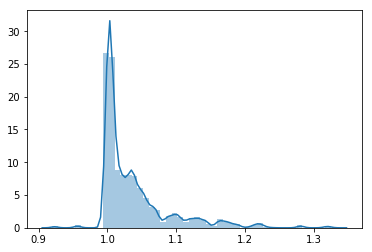

In [169]:
pdiff = gp['pressure(mmhg)']/gp['slpressure']
sns.distplot(pdiff.dropna())

In [170]:
ratio = pdiff.mean()
ratio

1.0373203937777893

In [171]:
pdiff.std()

0.05167366487308277

In [172]:
gp_before_pressure_fix = gp.copy()

In [173]:
gp.loc[gp['pressure(mmhg)'].isna(),'pressure(mmhg)'] = gp[gp['pressure(mmhg)'].isna()]['slpressure']*ratio
gp.loc[gp['slpressure'].isna(),'slpressure'] = gp[gp['slpressure'].isna()]['pressure(mmhg)']/ratio

In [174]:
gp.count()/len(gp)

observations                             1.000000
date                                     1.000000
month                                    1.000000
country                                  1.000000
region                                   1.000000
temp(c)                                  0.999426
slpressure                               0.867257
pressure(mmhg)                           0.867257
pressure change                          0.810347
humidity                                 0.979793
rain(mm)                                 1.000000
time of rain                             1.000000
Calm, no wind                            1.000000
Wind blowing from the east               1.000000
Wind blowing from the east-northeast     1.000000
Wind blowing from the east-southeast     1.000000
Wind blowing from the north              1.000000
Wind blowing from the north-east         1.000000
Wind blowing from the north-northeast    1.000000
Wind blowing from the north-northwest    1.000000


In [206]:
gp['temp(c)'].mean(),gp['temp(c)'].std()

(23.60800973448711, 6.610333585335583)

In [207]:
gp.describe()

,observations,month,temp(c),slpressure,pressure(mmhg),pressure change,humidity,rain(mm),time of rain,"Calm, no wind",...,Wind blowing from the north-west,Wind blowing from the south,Wind blowing from the south-east,Wind blowing from the south-southeast,Wind blowing from the south-southwest,Wind blowing from the south-west,Wind blowing from the west,Wind blowing from the west-northwest,Wind blowing from the west-southwest,variable wind direction
count,207152.000000,207152.000000,207033.000000,179654.000000,179654.000000,167865.000000,202966.000000,207152.000000,207152.000000,207152.000000,...,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000,207152.000000
mean,11.530606,5.487169,23.608010,723.938794,749.587723,25.561150,39.183517,2.060973,9.239756,0.150910,...,0.038398,0.068799,0.040551,0.034003,0.037424,0.066875,0.068039,0.030679,0.038194,0.016751
std,10.180917,3.485103,6.610334,40.167246,27.961177,32.816190,32.233594,11.136196,17.375488,0.245905,...,0.099177,0.148470,0.109791,0.097136,0.098058,0.159596,0.144769,0.086553,0.099583,0.067306
min,1.000000,1.000000,-5.000000,512.300000,531.419238,-73.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,19.233333,696.400000,756.417938,-0.062500,4.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,4.000000,24.775000,737.362500,759.300000,0.371429,38.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,8.000000,28.190476,756.323037,762.433333,59.636364,71.000000,0.000000,6.000000,0.250000,...,0.000000,0.076923,0.000000,0.000000,0.000000,0.041667,0.083333,0.000000,0.000000,0.000000
max,72.000000,12.000000,62.700000,823.500000,813.400000,100.000000,100.000000,466.000000,93.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [240]:
gp[gp['temp(c)'].isna()]

observations  \
country    region                                   date                       
Angola     Cabinda                                  2019-03-19             1   
           Dundo(airport)                           2018-12-17             1   
           Luanda(airport)                          2019-03-01             1   
           OndjivaPereira(airport)                  2018-08-11             1   
Lesotho    Maseru                                   2018-01-18             2   
                                                    2018-11-08             1   
           Maseru.Moshoeshoe(airport)               2018-04-14             1   
Madagascar Antalaha                                 2018-01-01             2   
                                                    2018-01-02             3   
                                                    2018-01-03             3   
                                                    2018-01-04             6   
                                                    2018-01-05             3   
                                                    2018-01-06             1   
                                                    2018-01-07             1   
                                                    2018-01-08             5   
                                                    2018-01-09             3   
                                                    2018-01-10             1   
                                                    2018-01-11             5   
                                                    2018-01-12             4   
                                                    2018-01-13             2   
                                                    2018-01-14             1   
                                                    2018-01-15             4   
                                                    2018-01-16             4   
                                                    2018-01-17             5   
                                                    2018-01-18             4   
                                                    2018-01-19             5   
                                                    2018-01-20             1   
                                                    2018-01-21             2   
                                                    2018-01-22             4   
                                                    2018-01-23             4   
...                                                                      ...   
Malawi     Lilongwe(airport)                        2018-10-29             1   
                                                    2019-02-22             1   
Mozambique Dindiza                                  2018-01-26             1   
           Lumbo                                    2018-07-08             1   
           Marrupa                                  2018-02-14             1   
Nigeria    Calabar                                  2018-03-11             1   
           Kaduna(airport)                          2018-09-13             1   
           Owerri                                   2019-04-23             1   
Rwanda     Gisenyi                                  2018-01-05             2   
Tunisia    ElBorma(airport)                         2019-01-21             1   
Zambia     Livingstone.HarryMwangaNkumbula(airport) 2018-11-29             1   
Zimbabwe   Beitbridge                               2018-12-22             1   
                                                    2019-03-21             1   
           Chipinge                                 2019-01-20             2   
                                                    2019-01-22             1   
                                                    2019-01-23             2   
                                                    2019-01-24             1   
                                                    2019-01-25  

In [266]:
togroup[['region','date']].groupby('region').nunique()['date'].unique()

array([486, 462, 475, 480, 291, 418, 482, 440, 409, 484, 121, 477, 428,
       115, 474, 481, 471, 456, 446,  95, 439, 436, 463, 422, 355, 434,
       483, 444, 407, 358, 443, 366, 464, 374, 485, 406, 352, 241, 196,
       210, 383, 271, 479, 441, 368, 467, 330, 476, 293, 411, 386, 478,
       380, 460, 402, 473, 470, 269, 377, 181, 461, 226, 349, 136, 468,
       257, 315, 442,  74, 367, 458, 191, 318, 119, 394, 388, 117, 410,
       417, 397,  99, 454, 195, 333, 465, 229, 200, 412, 370, 451, 393,
       382, 369, 262, 403, 336, 400, 353, 435, 459, 363, 398, 413, 466,
       395, 449, 288, 314,  94, 327,  79, 396, 387, 452,  89, 251, 220,
       266, 455, 118, 120, 294, 448,  69, 313, 384, 391, 342])

In [269]:
gp.count()/len(gp)

observations                             1.000000
month                                    1.000000
temp(c)                                  0.999426
slpressure                               0.867257
pressure(mmhg)                           0.867257
pressure change                          0.810347
humidity                                 0.979793
rain(mm)                                 1.000000
time of rain                             1.000000
Calm, no wind                            1.000000
Wind blowing from the east               1.000000
Wind blowing from the east-northeast     1.000000
Wind blowing from the east-southeast     1.000000
Wind blowing from the north              1.000000
Wind blowing from the north-east         1.000000
Wind blowing from the north-northeast    1.000000
Wind blowing from the north-northwest    1.000000
Wind blowing from the north-west         1.000000
Wind blowing from the south              1.000000
Wind blowing from the south-east         1.000000


In [270]:
gp.to_csv('groupedrp5.csv')

# Cloud Cover (unfinished)

In [69]:
cldcvr = rp5['cloudcover'].str.lower()

In [70]:
cldcvr.unique()

array([nan, 'few clouds (10-30%) 1200 m', 'no significant clouds', ...,
       'few clouds (10-30%)04 1020 m/07', 'no significant clouds 27/m19',
       'no significant clouds 20/m07'], dtype=object)

In [87]:
cldcvr.unique()[::2000]

array([nan, 'scattered clouds (40-50%) 690 m, overcast (100%) 930 m',
       'scattered clouds (40-50%) 480 m, few clouds (10-30%) 600 m, cumulonimbus clouds , broken clouds (60-90%) 780 m',
       'few clouds (10-30%) 150 m, scattered clouds (40-50%) 600 m, cumulus congestus of great vertical extent , few clouds (10-30%) 780 m, cumulonimbus clouds , broken clouds (60-90%) 1200 m',
       'scattered clouds (40-50%) 780 m, cumulus congestus of great vertical extent , broken clouds (60-90%) 1080 m',
       'few clouds (10-30%) 600 m, scattered clouds (40-50%) 750 m, few clouds (10-30%) 900 m, cumulonimbus clouds',
       'few clouds (10-30%) 750 m, overcast (100%) 1290 m',
       'scattered clouds (40-50%) 660 m, broken clouds (60-90%) 6300 m',
       'few clouds (10-30%) 1500 m, cumulonimbus clouds , few clouds (10-30%) 2100 m',
       'b, no significant clouds',
       'scattered clouds (40-50%) 330 m, broken clouds (60-90%) 450 m, few clouds (10-30%) 600 m, cumulonimbus clouds , broke